# Medical Cost Personal Datasets

C:\Users\justino\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset Loaded Successfully!
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


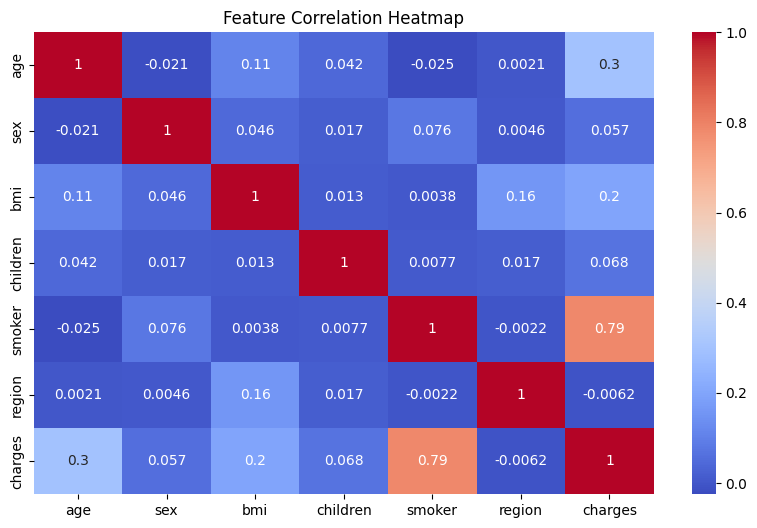

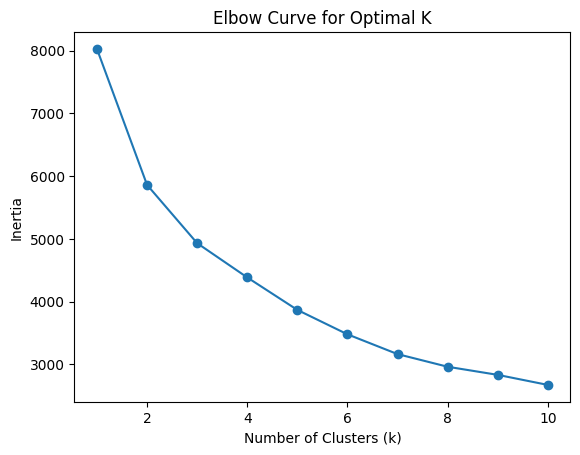

DBSCAN Cluster Distribution:
 Cluster_DBSCAN
 2    560
 1    502
 0    269
-1      7
Name: count, dtype: int64


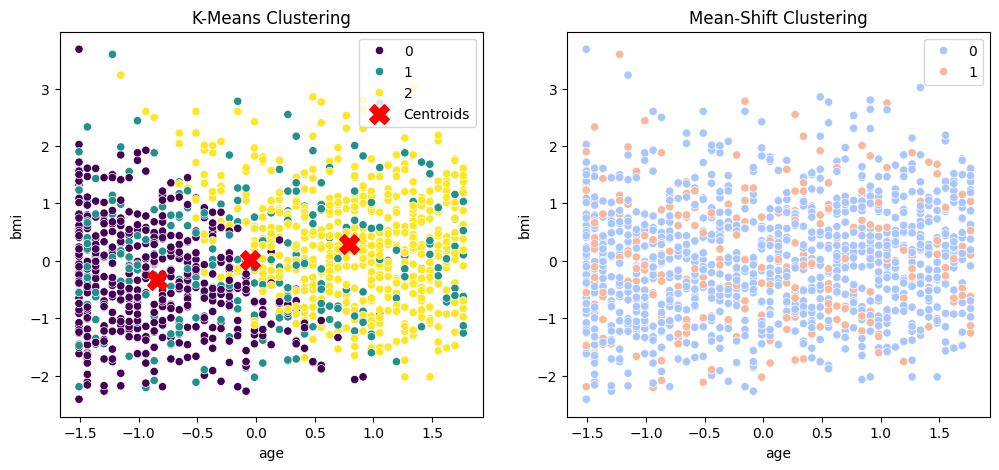

C:\Users\justino\AppData\Local\Temp\ipykernel_9880\473447842.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_scaled['Cluster_KMeans'], palette='viridis')


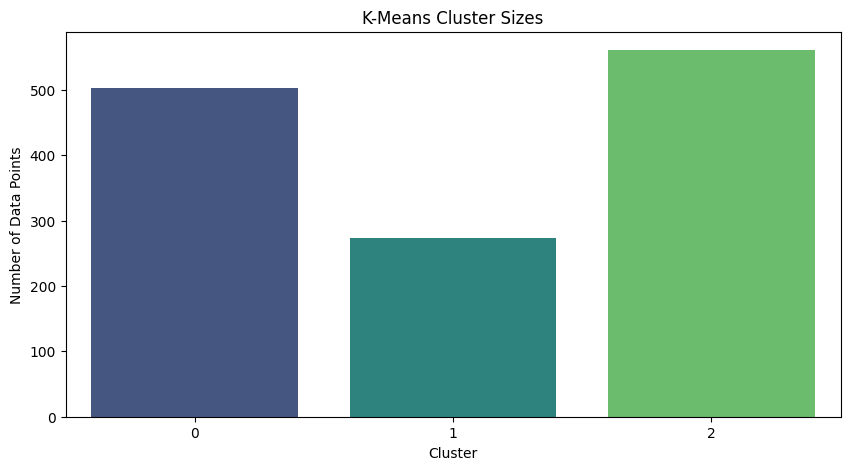

Breast Cancer DBSCAN Cluster Distribution:
 Cluster_DBSCAN
-1    371
 1    181
 0     12
 2      3
 3      2
Name: count, dtype: int64


In [1]:

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, DBSCAN
from sklearn.datasets import load_breast_cancer


path = kagglehub.dataset_download("mirichoi0218/insurance")
df = pd.read_csv(f"{path}/insurance.csv")
print("Dataset Loaded Successfully!")
print(df.head())

# Preprocessing


# Handle missing values (only for numerical columns)
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Encode categorical features
encoder = LabelEncoder()
for col in ['sex', 'smoker', 'region']:
    df[col] = encoder.fit_transform(df[col])

# Scale numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Feature Selection - Display correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# Drop low-impact features
df_scaled.drop(columns=['sex'], inplace=True)

# Step 3: K-Means Clustering

# Find optimal K using Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve for Optimal K")
plt.show()

# Apply K-Means with best k
best_k = 3  # Choose based on elbow method
kmeans = KMeans(n_clusters=best_k, random_state=42)
df_scaled['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)


# Step 4: Mean-Shift Clustering

bandwidth = estimate_bandwidth(df_scaled, quantile=0.2)
meanshift = MeanShift(bandwidth=bandwidth)
df_scaled['Cluster_MeanShift'] = meanshift.fit_predict(df_scaled)


# Step 5: DBSCAN on Insurance Dataset

dbscan = DBSCAN(eps=1.5, min_samples=5)
df_scaled['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)

# Show cluster distribution
print("DBSCAN Cluster Distribution:\n", df_scaled['Cluster_DBSCAN'].value_counts())


# Step 6: Visualizing Clusters


# Scatter plot of clusters using first two features
plt.figure(figsize=(12, 5))

# K-Means Clustering Visualization
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df_scaled['Cluster_KMeans'], palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids', marker="X")
plt.title("K-Means Clustering")
plt.xlabel(df_scaled.columns[0])
plt.ylabel(df_scaled.columns[1])
plt.legend()

# Mean-Shift Clustering Visualization
plt.subplot(1, 2, 2)
sns.scatterplot(x=df_scaled.iloc[:, 0], y=df_scaled.iloc[:, 1], hue=df_scaled['Cluster_MeanShift'], palette='coolwarm')
plt.title("Mean-Shift Clustering")
plt.xlabel(df_scaled.columns[0])
plt.ylabel(df_scaled.columns[1])
plt.legend()

plt.show()

# Histogram of Cluster Counts
plt.figure(figsize=(10, 5))
sns.countplot(x=df_scaled['Cluster_KMeans'], palette='viridis')
plt.title("K-Means Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Number of Data Points")
plt.show()


# Step 7: DBSCAN on Breast Cancer Dataset


# Load breast cancer dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)

# Scale data
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=cancer.feature_names)

# Apply DBSCAN
dbscan_cancer = DBSCAN(eps=2, min_samples=5)
X_scaled['Cluster_DBSCAN'] = dbscan_cancer.fit_predict(X_scaled)

# Show DBSCAN results
print("Breast Cancer DBSCAN Cluster Distribution:\n", X_scaled['Cluster_DBSCAN'].value_counts())
